# Exploring Car Sale Data

---------------------------------------------------------------------------------------------------------------

*In this guided project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.*

*The dataset was originally scraped and uploaded to Kaggle. We've made a few modifications from the original dataset that was uploaded to Kaggle:*

*In this project I will start by cleaning the data and then analysing the different brands to check for price and popularity and then see if there are any connections between price, mileage and damage. Throughout this project I will be using Pandas the python module and then visualizing some of the data using matplotlib.*

*The data dictionary provided with data is as follows:*

- dateCrawled - When this ad was first crawled. All field-values are taken from this date.
- name - Name of the car.
- seller - Whether the seller is private or a dealer.
- offerType - The type of listing
- price - The price on the ad to sell the car.
- abtest - Whether the listing is included in an A/B test.
- vehicleType - The vehicle Type.
- yearOfRegistration - The year in which the car was first registered.
- gearbox - The transmission type.
- powerPS - The power of the car in PS.
- model - The car model name.
- kilometer - How many kilometers the car has driven.
- monthOfRegistration - The month in which the car was first registered.
- fuelType - What type of fuel the car uses.
- brand - The brand of the car.
- notRepairedDamage - If the car has a damage which is not yet repaired.
- dateCreated - The date on which the eBay listing was created.
- nrOfPictures - The number of pictures in the ad.
- postalCode - The postal code for the location of the vehicle.
- lastSeenOnline - When the crawler saw this ad last online.

*Now lets begin by importing the necessary modules and reading the file*

In [1]:
# Import modules
import pandas as pd
import numpy as np

#Read dataset into Pandas
autos = pd.read_csv('autos.csv',encoding='Latin-1', engine='python')


*Great, now that we have the dataset as a dataframe. let's take a look at the first 5 rows and then a description of the dataset to see what we can learn.*

In [2]:
#First 5 rows
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [3]:
# Info about each column
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

**A few observations from the dataset:**

*The dataset contains 20 columns, most of which are strings.*

*Some columns have null values, but none have more than ~20% null values.*

*The column names use camelcase instead of Python's preferred snakecase, which means we can't just replace spaces with underscores.*

*The price and odometer columns are both object type, which means that we need to change them to integer types in order to access the numeric values.*

**We need to do some cleaning:**

*Firstly I will change the column names from camelcase to sankecase and also change a couple of the column names so that they better match the descriptions from the data dictionary.*

In [4]:
# Change column names
new_columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest', 'vehicle_type', 'registration_year',
              'gearbox', 'power_ps', 'model', 'odometer', 'registration_month', 'fuel_type', 'brand', 'unrepaired_damage',
              'ad_created', 'nr_of_pictures', 'postal_code', 'last_seen']

autos.columns = new_columns

*Now I will change the price and odometer columns to integer types. This will involve removing the non numeric values ($ , km) from the values and just putting them into the column name instead.*

In [5]:
# Rename price and odometer columns to show units 
autos = autos.rename(columns={'price': 'price($)', 'odometer':'odometer(km)'})

# Replace non numeric values in price and odometer columns and convert to interger datatype
autos['price($)'] = autos['price($)'].str.replace('$', '').str.replace(',','').astype(int)
autos['odometer(km)'] = autos['odometer(km)'].str.replace('km', '').str.replace(',', '').astype(int)

*Let's take a look at the first 5 rows of the dataset to check our new column names and to check the values in the price and odometer columns.*

In [6]:
# First 5 rows
autos.head() 

,date_crawled,name,seller,offer_type,price($),abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer(km),registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


*The columns have been cleaned successfully so let's move on.*

*Let's take a look at the description of the data to see if there is anything else that needs cleaning up or could be removed*

In [7]:
# Show data description
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price($),abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer(km),registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,5.000000e+04,50000,44905,50000.000000,47320,50000.000000,47242,50000.000000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-10 15:36:24,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,9.840044e+03,NaN,NaN,2005.073280,NaN,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,4.811044e+05,NaN,NaN,105.712813,NaN,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


*From the description we can see that their are 2 columns with only 2 unique values and that in each case one of the values accounts for 49,999 out of 50,000 of the occurances. We can therefore remove the seller and offer_type columns as they are redundant.*

In [8]:
# Remove unneeded columns
del autos['seller']
del autos['offer_type']

*Now to look for any values within the data that could be incorrect as they are unrealisticlly too high or too low. I will focus on the columns with numeric values where unrealistic outliers can potentially affect the reliability of ouor findings.*

*I will therefore take a look at the following columns:*

- price($)
- odometer(km)

*Firstly price($):*

In [9]:
# Show description of price column
autos['price($)'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price($), dtype: float64

*The max value is 100,000,000 dollars, I don't think anyone is buying a car on ebay for that much. Let's have a look at the 20 highes values in the price column.*

In [10]:
# Show most expensive cars in dataset
value_counts = autos['price($)'].value_counts()
value_counts.sort_index().tail(20)

197000      1
198000      1
220000      1
250000      1
259000      1
265000      1
295000      1
299000      1
345000      1
350000      1
999990      1
999999      2
1234566     1
1300000     1
3890000     1
10000000    1
11111111    2
12345678    3
27322222    1
99999999    1
Name: price($), dtype: int64

*There are 14 cars listed as being 999,990 dollars and above. Below that there is a big gap all the way down to 350,000 dollars which seems about right for the most expensive vehicle ebay. I will therefore remove all rows with a price above 350,000. 

In [11]:
# Remove unreialistic prices
autos = autos[autos['price($)'].between(0, 350000)]
# Show descrition of cleaned price column
autos['price($)'].describe()

count     49986.000000
mean       5721.525167
std        8983.617820
min           0.000000
25%        1100.000000
50%        2950.000000
75%        7200.000000
max      350000.000000
Name: price($), dtype: float64

*Now for the 20 lowest values*

In [12]:
# Show least expensive cars
autos['price($)'].value_counts().sort_index().head(20)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price($), dtype: int64

*There arent any outliers in this data. Yes, selling for nothing seems strange but there are 1421 listings at this price. Clearly with nearly 2.5 percent of listings at this price, these arent outliers but instead having a starting price of 0 is a legitimate practice on ebay. I therefore won't be removing any rows for having a price that is too low.*

*Now let's take a look at the odometer column:*

In [13]:
# Show description of odometer column
autos['odometer(km)'].describe()

count     49986.000000
mean     125736.506222
std       40038.133399
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer(km), dtype: float64

In [14]:
# Show value counts in order of index
autos['odometer(km)'].value_counts().sort_index()

5000        966
10000       264
20000       784
30000       789
40000       818
50000      1025
60000      1164
70000      1230
80000      1436
90000      1757
100000     2168
125000     5169
150000    32416
Name: odometer(km), dtype: int64

*Only 13 unique values. The odometer values have clearly been grouped together and there are no outliers here. We can therefore move on.*

*Now let's take a look at the columns with dates. There are 5 in total. I will begin by looking at the 3 string columns:*

In [15]:
# Show 3 columns with string dates
autos[['date_crawled', 'ad_created', 'last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [16]:
# Show dates of date crawled column
autos['date_crawled'].str[:10].value_counts(dropna=False)

2016-04-03    1934
2016-03-20    1891
2016-03-21    1874
2016-03-12    1838
2016-03-14    1831
2016-04-04    1824
2016-03-07    1798
2016-04-02    1770
2016-03-19    1745
2016-03-28    1742
2016-03-29    1707
2016-03-15    1699
2016-04-01    1690
2016-03-30    1681
2016-03-08    1663
2016-03-09    1660
2016-03-22    1645
2016-03-26    1624
2016-03-11    1624
2016-03-23    1619
2016-03-10    1606
2016-03-31    1595
2016-03-25    1587
2016-03-17    1575
2016-03-27    1552
2016-03-16    1475
2016-03-24    1455
2016-03-05    1269
2016-03-13     778
2016-03-06     697
2016-04-05     655
2016-03-18     653
2016-04-06     159
2016-04-07      71
Name: date_crawled, dtype: int64

*All of the listings were crawled between March 6th and April 7th 2016*

In [17]:
# Show dates of ad created column
autos['ad_created'].str[:10].value_counts(dropna=False).sort_index()

2015-06-11       1
2015-08-10       1
2015-09-09       1
2015-11-10       1
2015-12-05       1
              ... 
2016-04-03    1946
2016-04-04    1842
2016-04-05     592
2016-04-06     163
2016-04-07      64
Name: ad_created, Length: 76, dtype: int64

*Ads were created between June 11th 2015 and April 7th 2016.*

In [18]:
# Show dates of last seen column
autos['last_seen'].str[:10].value_counts(dropna=False).sort_index().tail(20)

2016-03-19      787
2016-03-20     1035
2016-03-21     1036
2016-03-22     1079
2016-03-23      929
2016-03-24      978
2016-03-25      960
2016-03-26      848
2016-03-27      801
2016-03-28     1042
2016-03-29     1116
2016-03-30     1242
2016-03-31     1191
2016-04-01     1155
2016-04-02     1244
2016-04-03     1268
2016-04-04     1231
2016-04-05     6212
2016-04-06    11046
2016-04-07     6546
Name: last_seen, dtype: int64

*All listings were last seen between March 19th and April 7th 2016*

*For these 3 columns nothing stands out as being out of the ordinary. Now let's check the registration year column to see if it matches what we would expect from the above data. There should be no registration years later than 2016 as that is when the last ads were created and the data was crawled.*


In [19]:
# Show description of registration year column
autos['registration_year'].describe()

count    49986.000000
mean      2005.075721
std        105.727161
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

*hmmmm well that is strange. We have cars registered as early as the year 1000 and as late as 9999, incredible! We need to take a closer look at the earliest and latest dates in the registration year column.*

In [20]:
# Show earliest dates
autos['registration_year'].value_counts().sort_index().head(20)

1000    1
1001    1
1111    1
1500    1
1800    2
1910    9
1927    1
1929    1
1931    1
1934    2
1937    4
1938    1
1939    1
1941    2
1943    1
1948    1
1950    3
1951    2
1952    1
1953    1
Name: registration_year, dtype: int64

In [21]:
# Show latest dates
autos['registration_year'].value_counts().sort_index().tail(20)

2011    1634
2012    1323
2013     806
2014     665
2015     399
2016    1316
2017    1452
2018     491
2019       3
2800       1
4100       1
4500       1
4800       1
5000       4
5911       1
6200       1
8888       1
9000       2
9996       1
9999       4
Name: registration_year, dtype: int64

*There are dates here which are not possible.*

*We need to remove the rows with impossible registration dates. The Ford Model T became the first mass produced car in 1908. I will use that date as the cut off and remove everything from before that date.*

*As we saw from the ad_created column these cars were all listed between 2015 and 2016. Therefore we cannot have any cars with a reistration date later than 2016 and must remove all of those rows as well.*

In [22]:
# Remove impossible dates
autos = autos[autos['registration_year'].between(1908,2016)]

*Let's take a look at the remaining values in a histogram.*

Text(0.5, 0, 'Date')

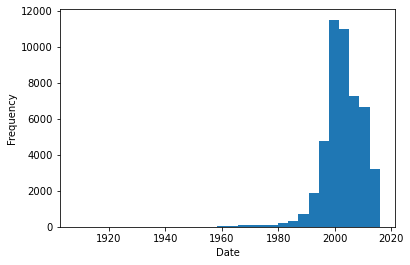

In [23]:
# Import graph plotting module
from matplotlib import pyplot as plt
%matplotlib inline

# Plot histgogram
ax = autos['registration_year'].plot(kind='hist', bins=30, range=(1908, 2016))
ax.set_xlabel('Date')

*With the unrealistic dates gone we now have the values you would expect. Lot's of cars from the past 20 years and progressivly less as we go further in the past.*

*Our dataset now only contains accurate dates.*

*The next step is translate from German to English.*

In [24]:
autos.head()

,date_crawled,name,price($),abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer(km),registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


*Just looking through the columns we can see that the 'vehicle_type', 'gearbox', 'fuel_type' and 'unrepaired_damage' all contain strings that may be in Gemran (other columns also are strings but they are names so we don't need to worry about translating them. I am going to first check the unique values in each column and then replace all of the German words with English ones. This will require some help from google translate.*

In [25]:
# Check for any German in vehicle type column
autos['vehicle_type'].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

In [26]:
# Translate German to English
autos['vehicle_type'] = autos['vehicle_type'].str.replace('kleinwagen', 'mini').str.replace('kombi', 'combination')
autos['vehicle_type'] = autos['vehicle_type'].str.replace('cabrio', 'convertible').str.replace('andere', 'other')
# Check to see new values in vehicle type column
autos['vehicle_type'].unique()

array(['bus', 'limousine', 'mini', 'combination', nan, 'coupe', 'suv',
       'convertible', 'other'], dtype=object)

In [27]:
# Check for any german in gerabox column
autos['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [28]:
# Translate German to English
autos['gearbox'] = autos['gearbox'].str.replace('manuell', 'manual').str.replace('automatik', 'automatic')
# Check to see new values in Gearbox column
autos['gearbox'].unique()

array(['manual', 'automatic', nan], dtype=object)

In [29]:
# Check for any German in Fuel type column
autos['fuel_type'].unique()

array(['lpg', 'benzin', 'diesel', nan, 'cng', 'hybrid', 'elektro',
       'andere'], dtype=object)

In [30]:
# Translate German to English
autos['fuel_type'] = autos['fuel_type'].str.replace('benzin', 'petrol').str.replace('elektro', 'electric').str.replace('andere', 'other')
# Check to see new values in fuel type column
autos['fuel_type'].unique()

array(['lpg', 'petrol', 'diesel', nan, 'cng', 'hybrid', 'electric',
       'other'], dtype=object)

In [31]:
# Check for any German in unrepaired damage column
autos['unrepaired_damage'].unique()

array(['nein', nan, 'ja'], dtype=object)

In [32]:
# Translate German to English
autos['unrepaired_damage'] = autos['unrepaired_damage'].str.replace('nein', 'no').str.replace('ja', 'yes')
# Check to see new values in unrepaired damage column
autos['unrepaired_damage'].unique()

array(['no', nan, 'yes'], dtype=object)

*Great, our dataset now contains English instead of German. Everything seems to be ready to do some data analysis!*



**Now that the data is cleaned we can start to analyse it.**

*First, I am going to look at the different car brands in the dataset. I want to have a look at which car brands are the most popular in the dataset and then narrow down our data to include the popular car brands. I will count popular as any brand that is above 2% of the dataset. 2% of 50,000 is 1000 which I think is a reasonable cut off point.* 

In [33]:
#Loop through brand column and create frequency table in brands dictionary
brand_frequency = {}

for values in autos['brand'].sort_index():
    if values in brand_frequency:
        brand_frequency[values] += 1
    else:
        brand_frequency[values] = 1

# Find % of each car brand
total = sum(brand_frequency.values())
percentages = {}
for keys, values in brand_frequency.items():
    percent = values * 100 / total
    percentages[keys] = percent

# Narrow down to brands above 2
brands_above_2_percent = {}
for keys, values in percentages.items():
    if values > 2:
        brands_above_2_percent[keys] = values
# Show dictionary
brands_above_2_percent


{'peugeot': 2.953182272575808,
 'bmw': 11.002582472509163,
 'volkswagen': 21.211679440186604,
 'ford': 6.976841052982339,
 'renault': 4.7359213595468175,
 'mercedes_benz': 9.536404531822726,
 'audi': 8.640869710096634,
 'opel': 10.817227590803066,
 'fiat': 2.586637787404199}

*Im going to make this information a little easier to view by putting it into a bar chart:*

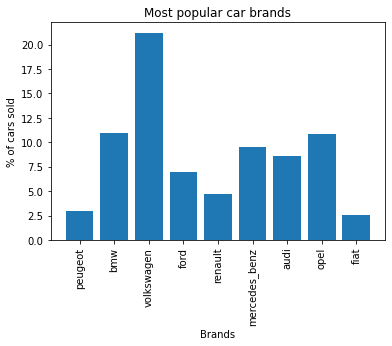

In [34]:
# Plot Bar chart
plt.bar(brands_above_2_percent.keys(), brands_above_2_percent.values())
plt.ylabel('% of cars sold')
plt.xlabel('Brands')
plt.xticks(rotation=90)
plt.title('Most popular car brands')
plt.show()

*Here we can see that Volkswagen is by far the most popular car brand on German ebay. This is followed by 4 more German car brands; BMW, Mercedes, Audi and Opel. The most popular non German brand is Ford.*

*Now let's have a look at the average price of these popular car brands:*

In [35]:
#Find average price of each brand.
mean_brands = {}
brand_names = autos['brand'].unique()
for brand in brand_names:
    selected_rows = autos[autos['brand'] == brand ]
    mean = selected_rows['price($)'].mean()
    mean_brands[brand] = mean

#Fitler out brands with less than 2 percent of sales.
popular_brands = brands_above_2_percent.keys()
mean_price_popular_brands = {}
for key, value in mean_brands.items():
    if key in popular_brands:
        mean_price_popular_brands[key] = value

#Show dictionary     
mean_price_popular_brands

{'peugeot': 3039.4682651622,
 'bmw': 8102.536248343744,
 'volkswagen': 5231.081983308787,
 'ford': 3652.095223880597,
 'renault': 2395.4164467897976,
 'mercedes_benz': 8485.239571958942,
 'audi': 9093.65003615329,
 'opel': 2876.716403542549,
 'fiat': 2711.8011272141707}

*Again I will put this information into a bar char to make it more readable.*

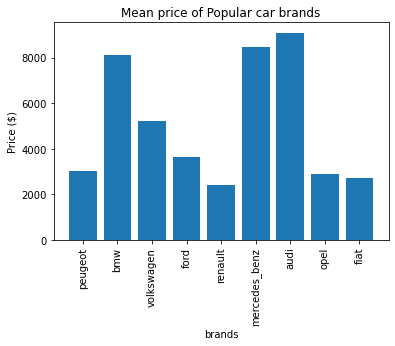

In [36]:
#Plot Bar Chart
plt.bar(mean_price_popular_brands.keys(), mean_price_popular_brands.values())
plt.title('Mean price of Popular car brands')
plt.xticks(rotation=90)
plt.ylabel('Price ($)')
plt.xlabel('brands')
plt.show()

*We can see that the three luxury German brands are the three most expensive, with a fourth German brand, Volkswagen, coming next. After that come Ford and Peugeot, followed by Renault. Opel and Fiat. This means that not only are BMW, Mercedes and Audi the 3 most popular brands but they are also the 3 most expensive as well.*

*Next, lets take a look at the average mileage of each of this brands. Like with the price I will plot the results into a bar chart.*

In [37]:
#Find average mileage of car brands
mean_mileage_brands = {}
brand_names = autos['brand'].unique()
for brand in brand_names:
    selected_rows = autos[autos['brand'] == brand]
    mean = selected_rows['odometer(km)'].mean()
    mean_mileage_brands[brand] = mean
    
#Fitler out brands with less than 2 percent of sales.
popular_brands = brands_above_2_percent.keys()
mean_mileage_popular_brands = {}
for key, value in mean_mileage_brands.items():
    if key in popular_brands:
        mean_mileage_popular_brands[key] = value
    
mean_mileage_popular_brands

{'peugeot': 127136.81241184767,
 'bmw': 132431.38368351315,
 'volkswagen': 128724.10407461954,
 'ford': 124068.65671641791,
 'renault': 128183.81706244503,
 'mercedes_benz': 130856.0821139987,
 'audi': 129287.78018799711,
 'opel': 129223.14208702349,
 'fiat': 116553.94524959743}

*This data is easier to visualize in a var chart:*

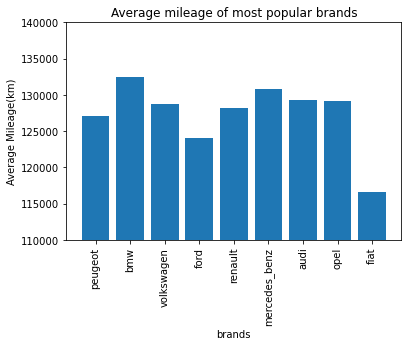

In [38]:
# Plot bar chart
plt.bar(mean_mileage_popular_brands.keys(), mean_mileage_popular_brands.values())
plt.ylim(110000, 140000)
plt.xticks(rotation=90)
plt.ylabel('Average Mileage(km)')
plt.xlabel('brands')
plt.title('Average mileage of most popular brands')
plt.show()

*We can see here that on average each brand has similar mileage on the clock, between 110,000 and 130,000 KM. BMW has the highest average and Fiat is the lowest. On the whole there is little difference between the average mileage of different brands, with the majority of brands having an average mileage of 125,000 and 135,000 km.*

*I now want to have a look to see if there is a comparison between the average price and average mileage of these popular brands.*

In [39]:
# Create panda series for mean price and mean mileage
mean_price_series = pd.Series(mean_price_popular_brands)
mean_mileage_series = pd.Series(mean_mileage_popular_brands)

# Create dataframe using these 2 series
price_mileage_dataframe = pd.DataFrame(mean_price_series, columns=['mean_price'])
price_mileage_dataframe['mean_mileage'] = mean_mileage_series

# Show mean price and mileage side by side
price_mileage_dataframe

,mean_price,mean_mileage
peugeot,3039.468265,127136.812412
bmw,8102.536248,132431.383684
volkswagen,5231.081983,128724.104075
ford,3652.095224,124068.656716
renault,2395.416447,128183.817062
mercedes_benz,8485.239572,130856.082114
audi,9093.650036,129287.780188
opel,2876.716404,129223.142087
fiat,2711.801127,116553.945250


*This time for a viusalization of the data I will plot a scatter chart with the mileage on the x axis and the mean price on the y axis.*

Text(125900, 2300, 'Renault')

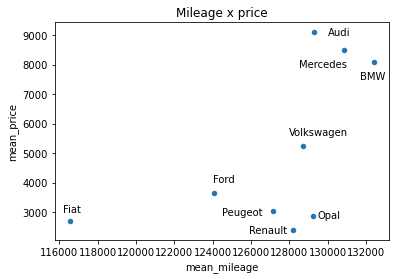

In [58]:
# Plot scatter chart
ax = price_mileage_dataframe.plot(x='mean_mileage', y='mean_price', kind='scatter', title='Mileage x price')
ax.text(130000, 9000, 'Audi')
ax.text(128500, 7900, 'Mercedes')
ax.text(131700, 7500, 'BMW')
ax.text(128000, 5600, 'Volkswagen')
ax.text(116200, 3000, 'Fiat')
ax.text(124000, 4000, 'Ford')
ax.text(124500, 2900, 'Peugeot')
ax.text(129500, 2800, 'Opal')
ax.text(125900, 2300, 'Renault')

*We would expect the cars which have a higer mileage to cost less. However, in the top right hand corner we can see that the three highest priced brands (BMW, Mercedes, Audi) also have the highest average mileage. This is largely a result of the average mileage between brands being very similar. All that we can conclude from this is that the price difference of brands is not affected by mileage but by other factors.*

*In order to see the difference that mileage can make to price we need to look at all of the cars in the dataset individually and see if their is a pattern between the average mileage and the average price of each car.*

In [41]:
# Find values in odometer column
mileage = autos['odometer(km)'].value_counts()

# Create dictionary with mileage as the key and average price as the values
price_mileage = {}
mileage = autos['odometer(km)'].unique()
for miles in mileage:
    selected_rows = autos[autos['odometer(km)'] == miles]
    mean = selected_rows['price($)'].mean()
    miles = str(miles)
    price_mileage[miles] = mean

# Sort keys into ascending numerical order    
sorted_keys = sorted(price_mileage, key=lambda line: int(line.split()[0]))

# Create new dictionary with sorted keys
sorted_dict = {}
for v in sorted_keys:
    sorted_dict[v] = 0
for k, v in price_mileage.items():
    sorted_dict[k] += v
    
# Show dictionary
sorted_dict

{'5000': 7654.626373626374,
 '10000': 19890.5983935743,
 '20000': 17940.720838794234,
 '30000': 16414.45513654096,
 '40000': 15441.445,
 '50000': 13633.68588469185,
 '60000': 12286.970096745823,
 '70000': 10817.819849874895,
 '80000': 9575.700573065902,
 '90000': 8350.228183962265,
 '100000': 7936.031768610716,
 '125000': 6086.20790481952,
 '150000': 3654.0014505366985}

*Now to put the dictionary into a bar chart for a better visualization.*

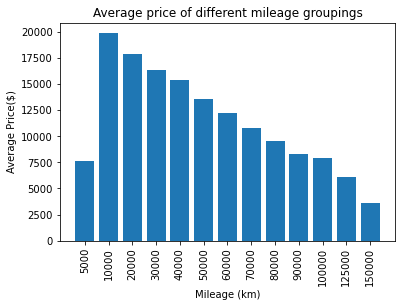

In [42]:
# Plot bar chart showing average price and average mileage
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.xticks(rotation=90)
plt.ylabel('Average Price($)')
plt.xlabel('Mileage (km)')
plt.title('Average price of different mileage groupings')
plt.show()

*The results here are clear. The more km's on the clock, the less a car will cost. The one outlier is cars with very few km's on the clock (around 5000km).*

*There could be numerous reasons why the cars wiht the lowest mileage fall outside of this trend. Perhaps, people only sell cars with low mileage if there is something wrong with them. let's finish by having a look at the relationship between average price and whether a car has unrepaired damage:*

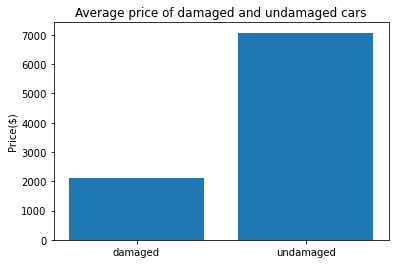

In [43]:
# Split cars between damaged and undamaged
damaged = autos[autos['unrepaired_damage'] == 'yes']
undamaged = autos[autos['unrepaired_damage'] == 'no']

# Find mean price for damaged and undamaged cars
damaged_mean_price = damaged['price($)'].mean()
undamaged_mean_price = undamaged['price($)'].mean()

# Plot bar chart to visualize data
plt.bar(['damaged', 'undamaged'], [damaged_mean_price, undamaged_mean_price])
plt.title('Average price of damaged and undamaged cars')
plt.ylabel('Price($)')
plt.show()

*The results here are very clear. A damaged car is on average 5000 dollars cheaper than an undamaged car.*

**3 Main Takeaways**

- BMW, Mercedes and Audi are the kings of the German auto ebay market. They have the 3 most popular and three most expensive car brands on average. With Volkswagen as the fourth most popular it is clear that Germans like to buy German.

- Mileage has a significant affect on the price of vehicles. The more miles on the clock, the less expensive the car will tend to be.

- The same is true of cars with unrepaired damage. On average a car with unrepaired damage will cost 5000 dollars less than one without damage. 